
**PCB Hole Qualification**

Description:

Quality control is of vital importance during electronics production. As the methods of producing electronic circuits improve, there is an increasing chance of solder defects during assembling the printed circuit board (PCB). Technology like X-ray imaging is used for inspection.

AI-based models are proposed in the state-of-the art.

We use one of the latest segmentation models to solve this problem of void detection.

SAM (Segment Anything Model) It is agnostic model that can segment every single region in the image as a new class, using a point or surrounding the target zones.

Project steps

Part 1 - Completed on Roboflow

■ Annotation

■ Augmentation

Part 2 - This Notebook

■ Yolo training on two classes:

voids

component (darker background)

■ Yolo validation

Part 3

■ Using a pre-trained SAM to segment voids and background, using the output of yolo:

Input: image and corresponding bounding boxes given by yolo as output
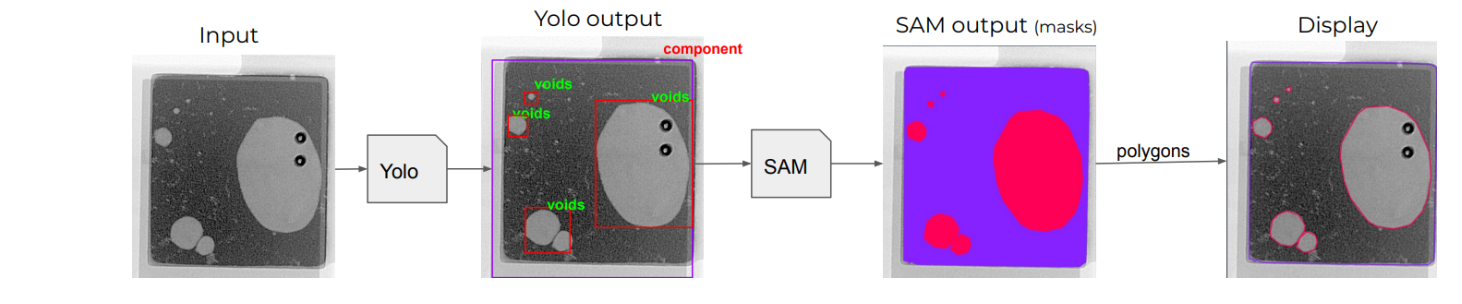

Output: segmented areas with two different masks

image.png

Before you start
Let's make sure that we have access to GPU. We can use nvidia-smi command to do that. In case of any problems navigate to Edit -> Notebook settings -> Hardware accelerator, set it to GPU, and then click Save.


In [1]:
!nvidia-smi

Thu Mar 28 21:39:06 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
import torch
from IPython.display import display, Image

HOME = os.getcwd()
print(HOME)

/content


In [3]:
!git clone https://github.com/SkalskiP/yolov9.git

fatal: destination path 'yolov9' already exists and is not an empty directory.


In [4]:
!cd yolov9
!pip3 install -r yolov9/requirements.txt -q

In [5]:
!mkdir -p {HOME}/weights
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [6]:
!mkdir -p {HOME}/data
!wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg
SOURCE_IMAGE_PATH = f"{HOME}/dog.jpeg"

In [7]:
!python yolov9/detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0

detect: weights=['/content/weights/gelan-c.pt'], source=/content/data/dog.jpeg, data=yolov9/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov9/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
image 1/1 /content/data/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 handbag, 124.1ms
Speed: 0.4ms pre-process, 124.1ms inference, 506.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov9/runs/detect/exp3


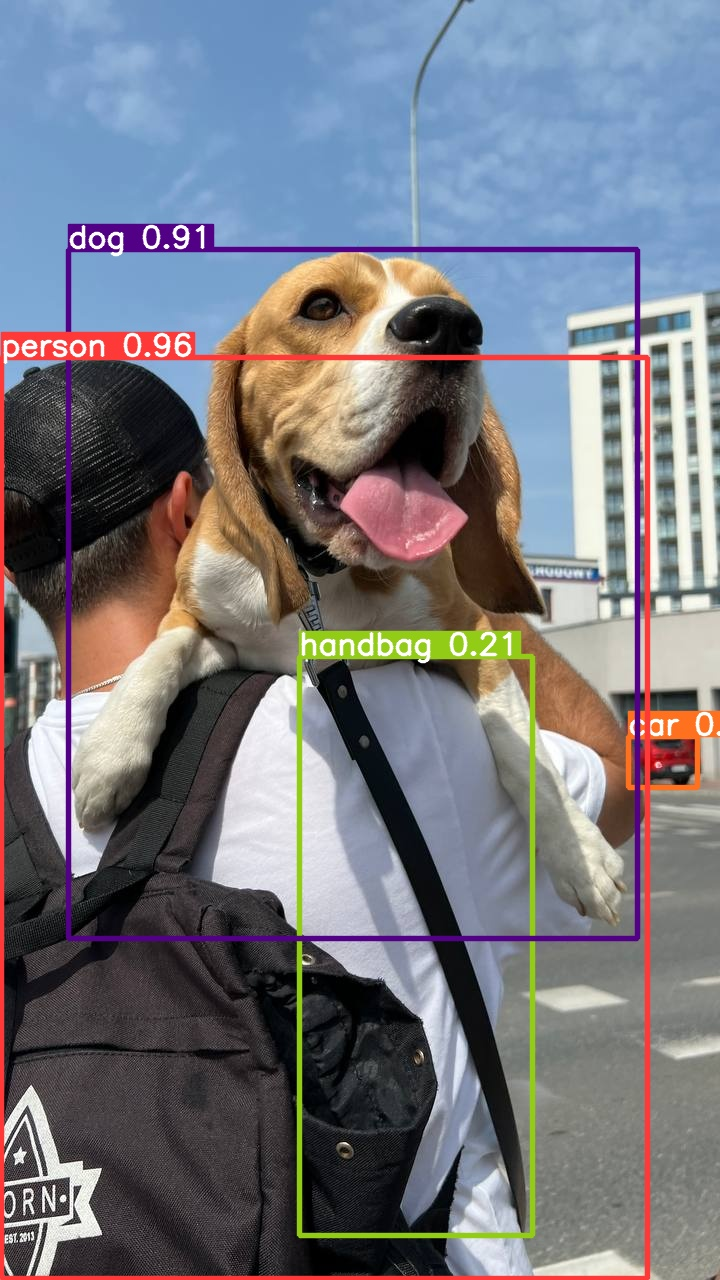

In [8]:
Image(filename=f"{HOME}/yolov9/runs/detect/exp/dog.jpeg", width=600)

In [9]:
!python yolov9/detect.py --weights {HOME}/weights/yolov9-e.pt --conf 0.1 --source {HOME}/data/dog.jpeg --device 0

detect: weights=['/content/weights/yolov9-e.pt'], source=/content/data/dog.jpeg, data=yolov9/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov9/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 1119 layers, 69470144 parameters, 0 gradients, 244.0 GFLOPs
image 1/1 /content/data/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 175.0ms
Speed: 0.5ms pre-process, 175.0ms inference, 482.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov9/runs/detect/exp4


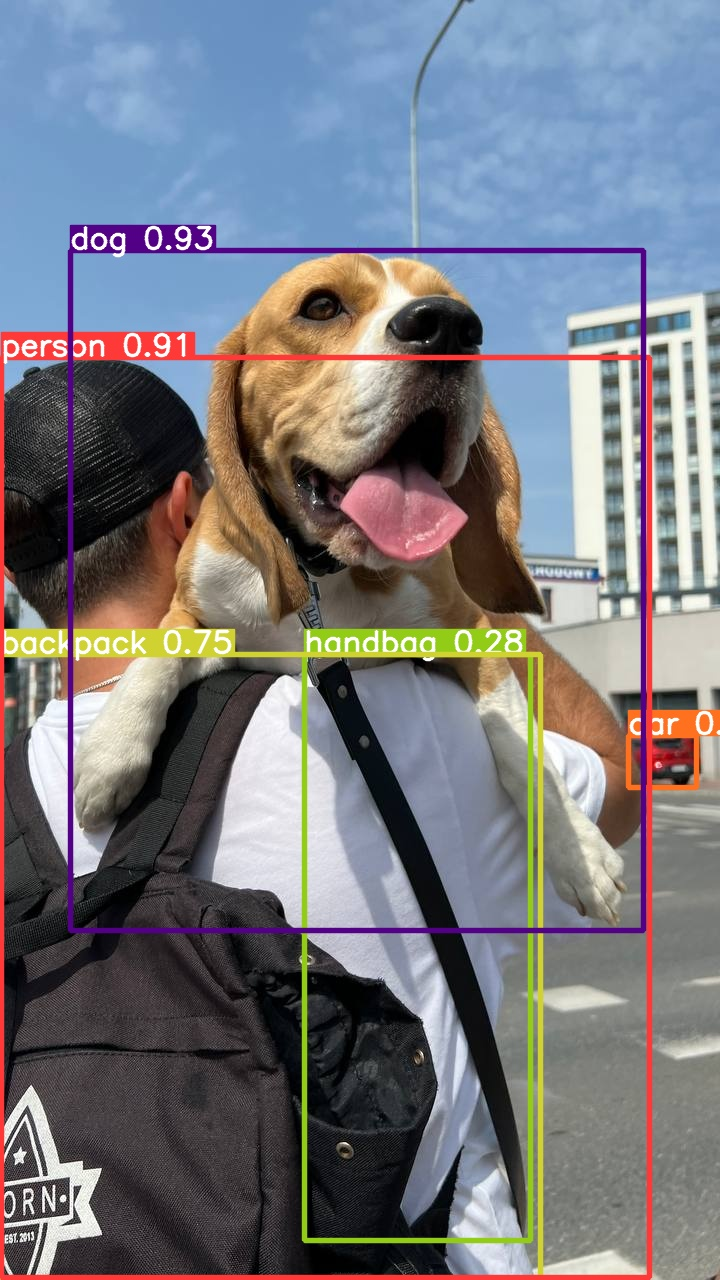

In [10]:
Image(filename=f"{HOME}/yolov9/runs/detect/exp2/dog.jpeg", width=600)

In [22]:
%cd {HOME}/yolov9

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="Hp5hidJ2MxhXMd3IYOmb")
project = rf.workspace("samdeploymentmodel").project("pcb_quality_control")
dataset = project.version(1).download("yolov9")

/content/yolov9
loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov9 in progress : 85.0%
Version export complete for yolov9 format


In [24]:
%cd {HOME}/yolov9

!python train.py \
--batch 3 --epochs 20 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/datasets/PCB_Quality_Control-1/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-03-28 21:58:23.232075: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-28 21:58:23.232125: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-28 21:58:23.233588: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=/content/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/content/datasets/PCB_Quality_Control-1/data.yaml, hyp=hyp.scratch-high.yaml, epochs=20, batch_size=3, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, m

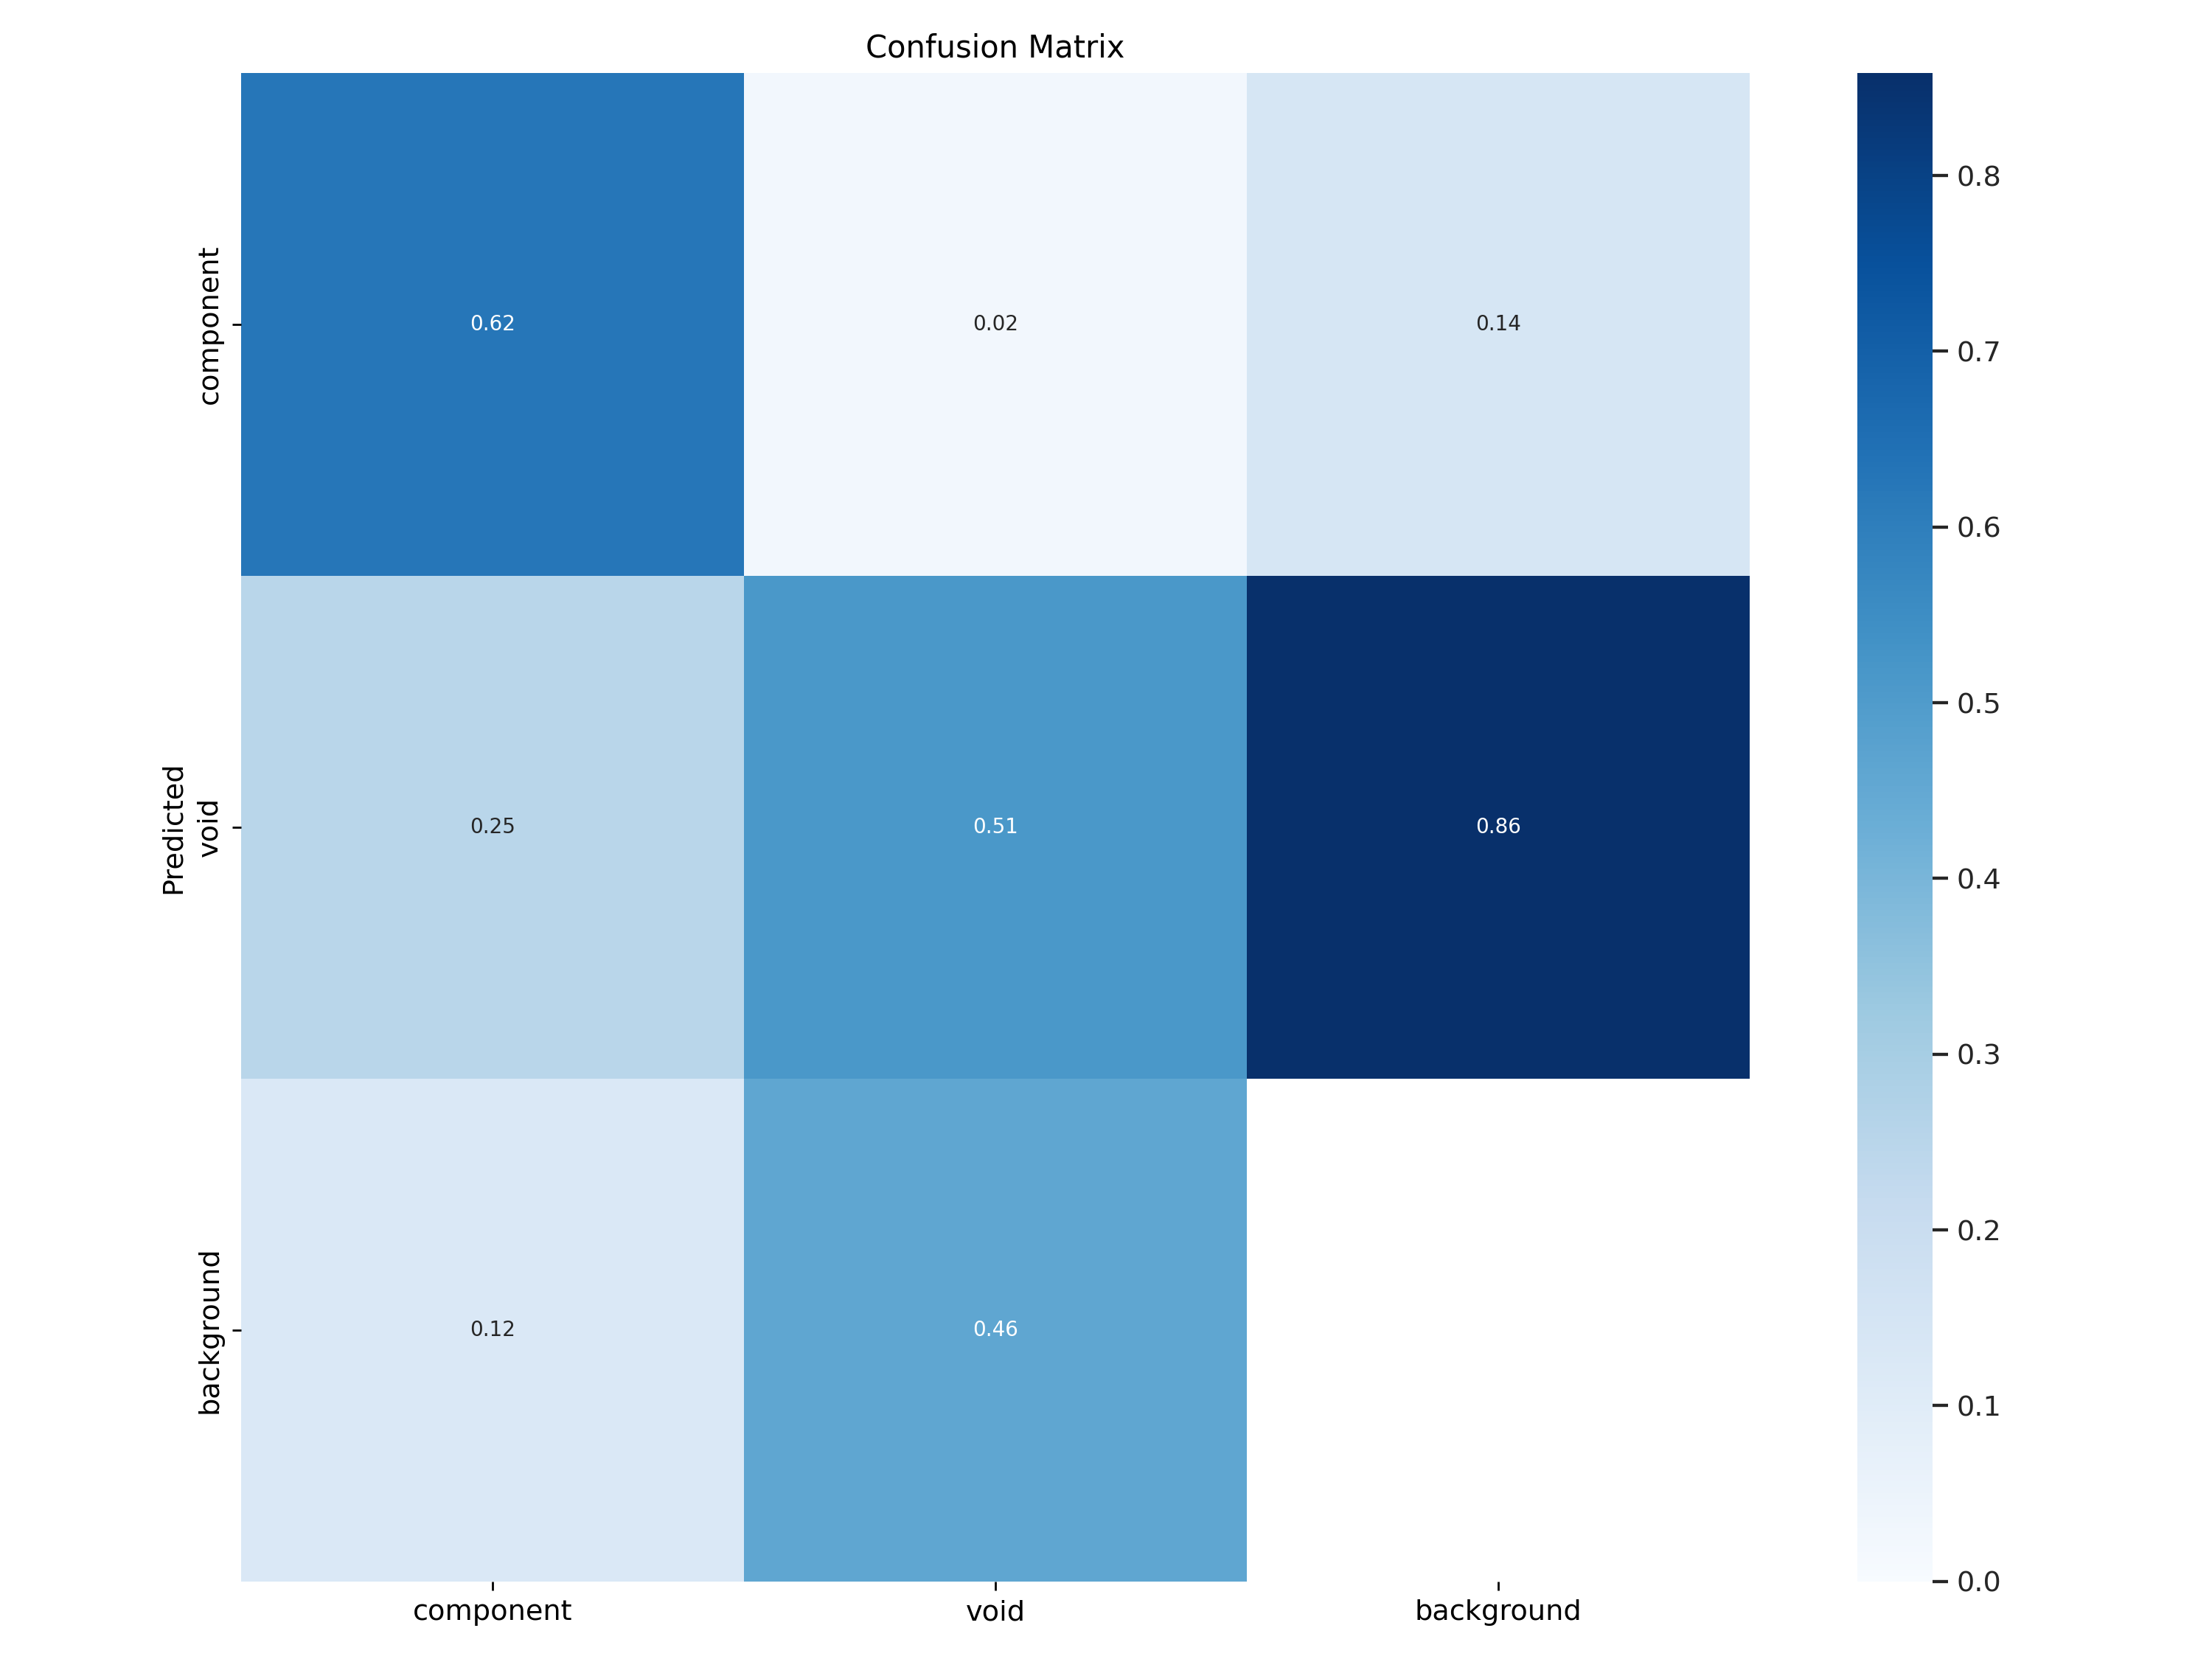

In [26]:
Image(filename=f"{HOME}/yolov9/runs/train/exp14/confusion_matrix.png", width=1000)

Validation set

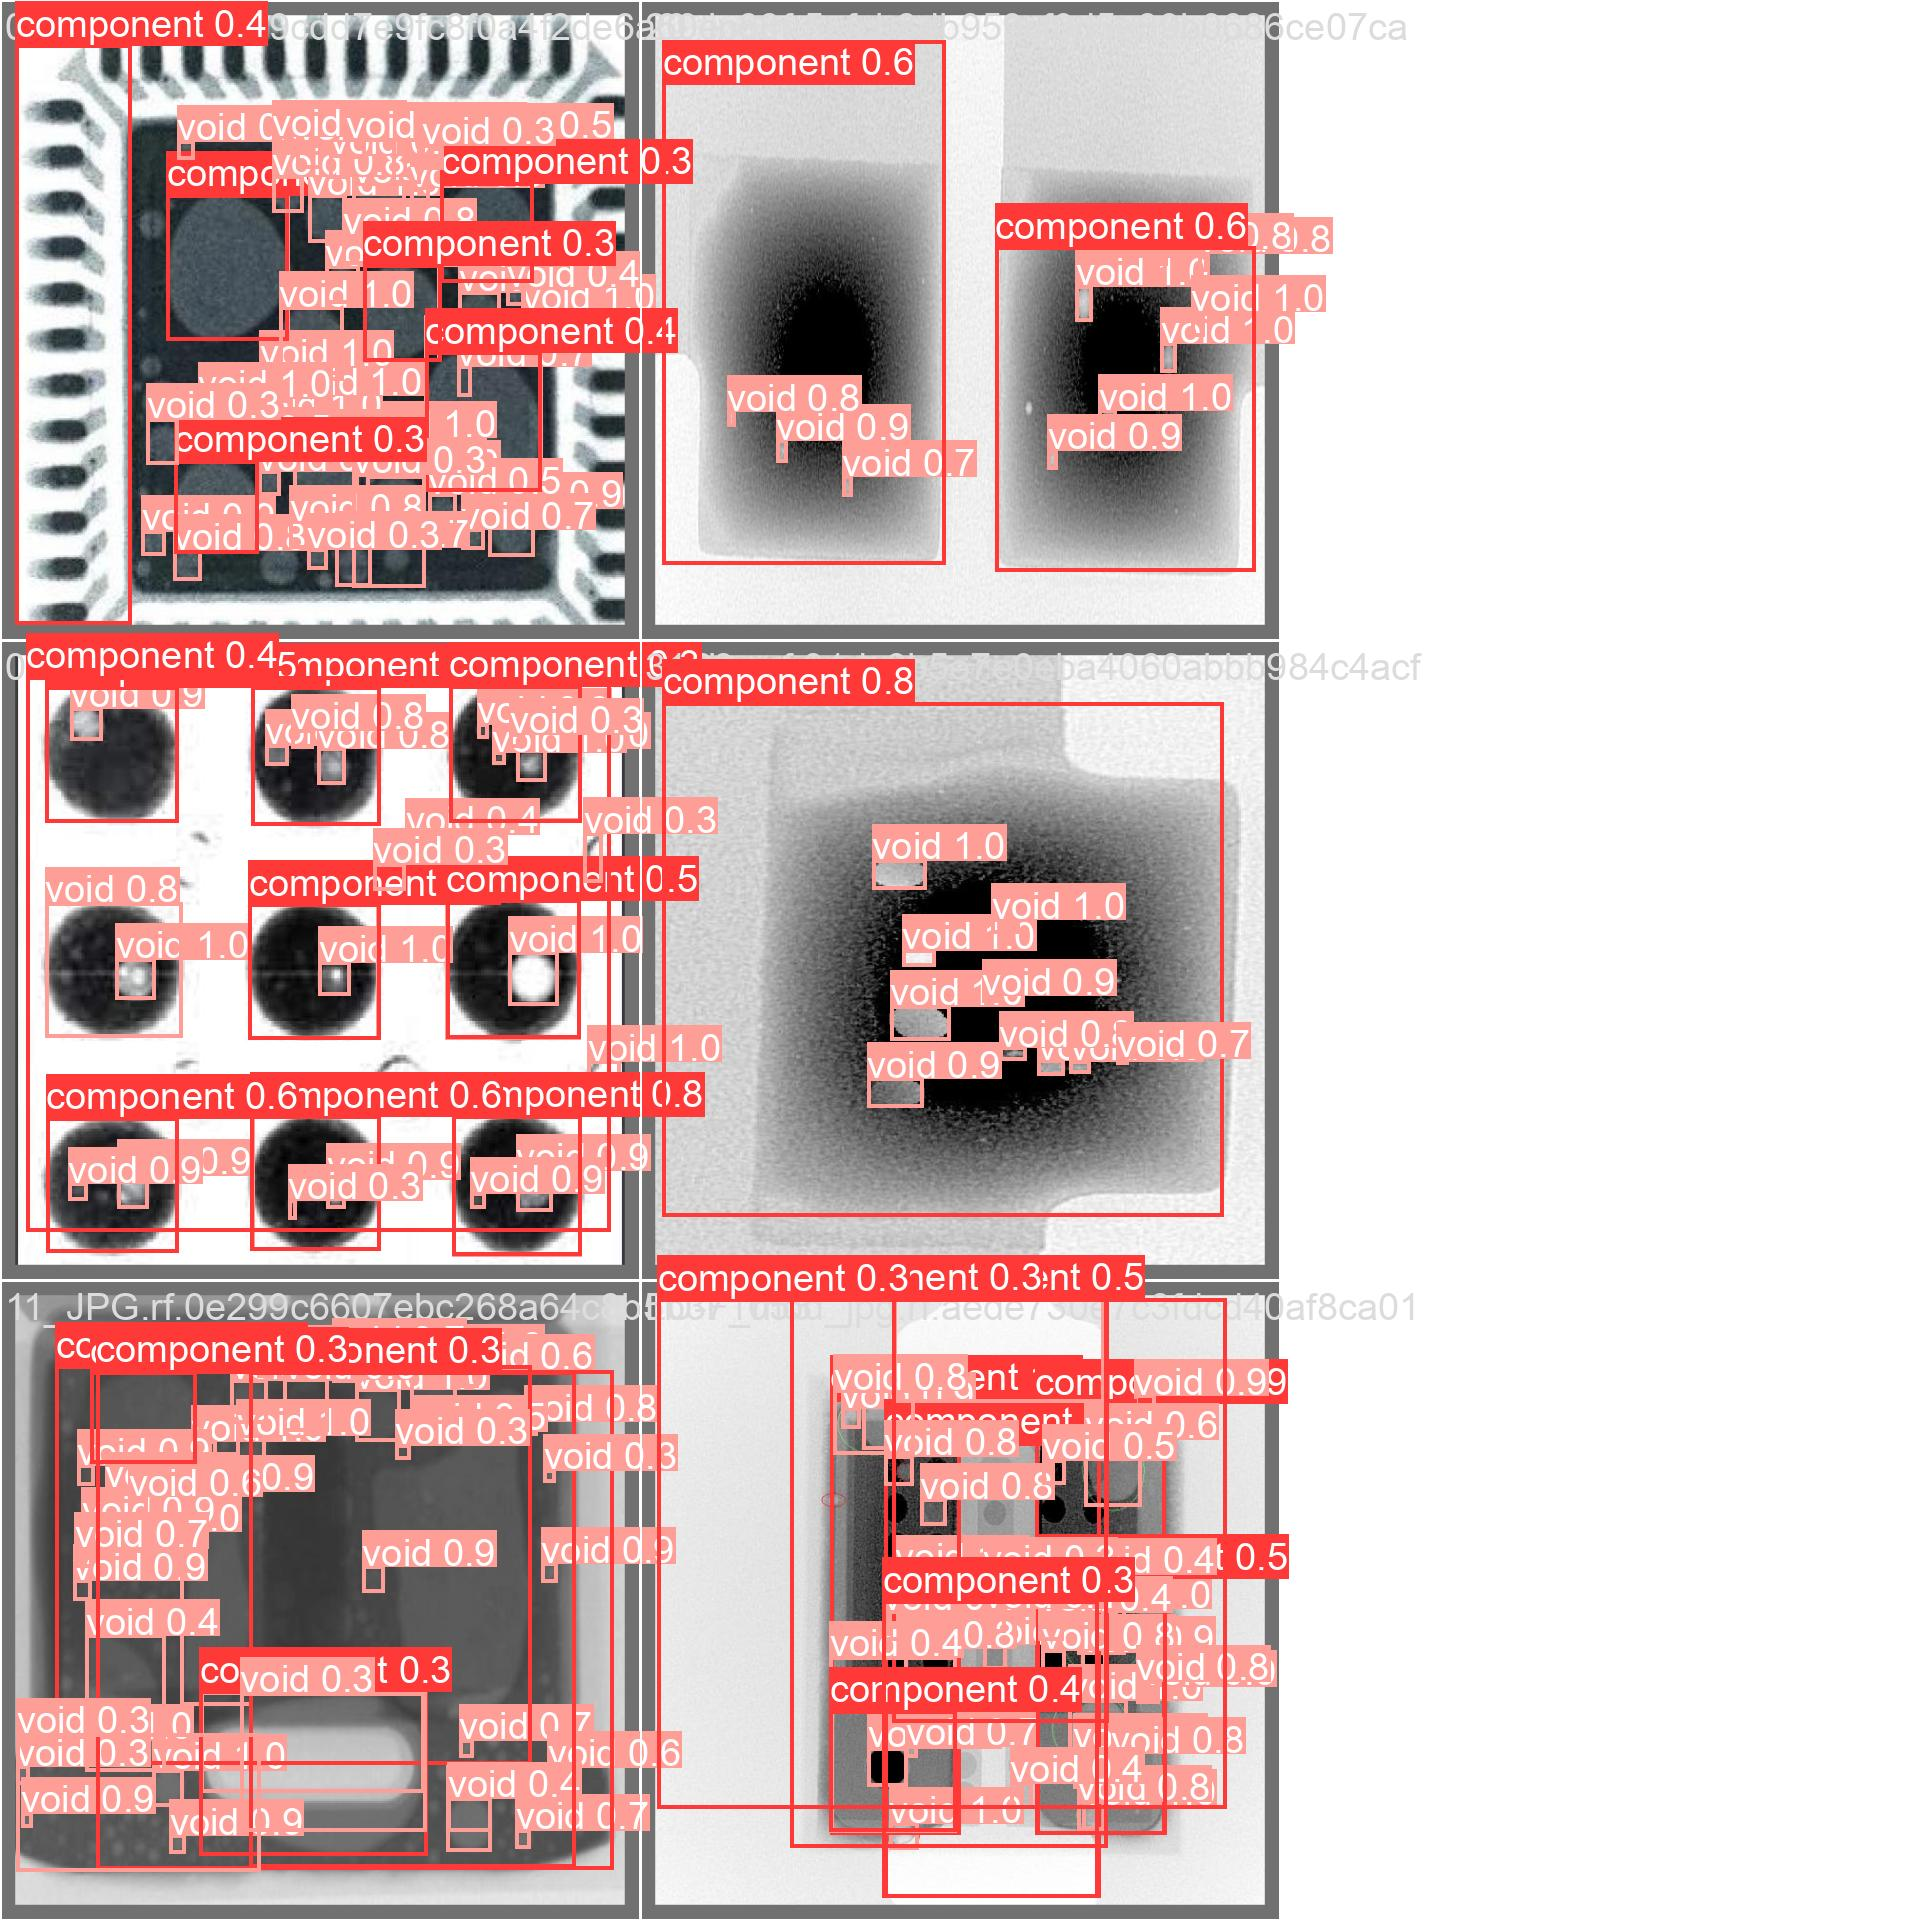

In [27]:
Image(filename=f"{HOME}/yolov9/runs/train/exp14/val_batch0_pred.jpg", width=1000)


Run Inference on the Custom Model

In [29]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp14/weights/best.pt \
--source {dataset.location}/valid/images

detect: weights=['/content/yolov9/runs/train/exp14/weights/best.pt'], source=/content/yolov9/PCB_Quality_Control-1/valid/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25412502 parameters, 0 gradients, 102.5 GFLOPs
image 1/7 /content/yolov9/PCB_Quality_Control-1/valid/images/03_JPG.rf.ca869cdd7e9fc8f0a4f2de6a60ec8833.jpg: 1280x1280 27 components, 75 voids, 106.7ms
image 2/7 /content/yolov9/PCB_Quality_Control-1/valid/images/06_jpg.rf.c5a076fe7224a3bacc3c30c22088aec5.jpg: 1280x1280 13 components, 28 voids, 104.3

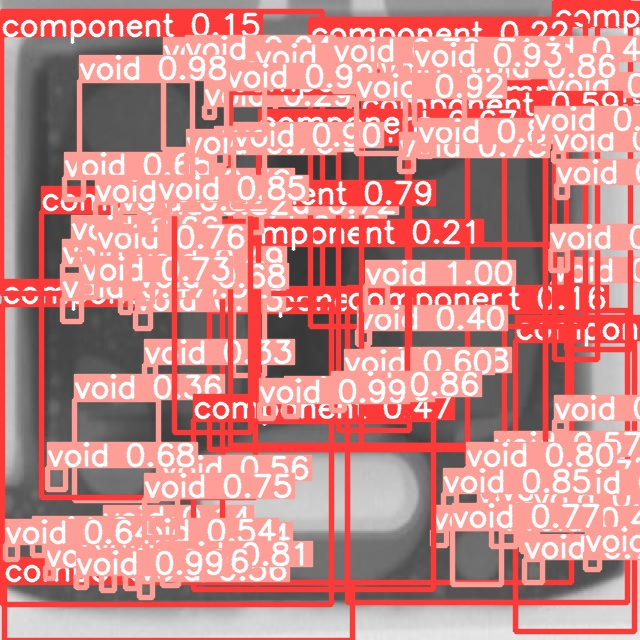

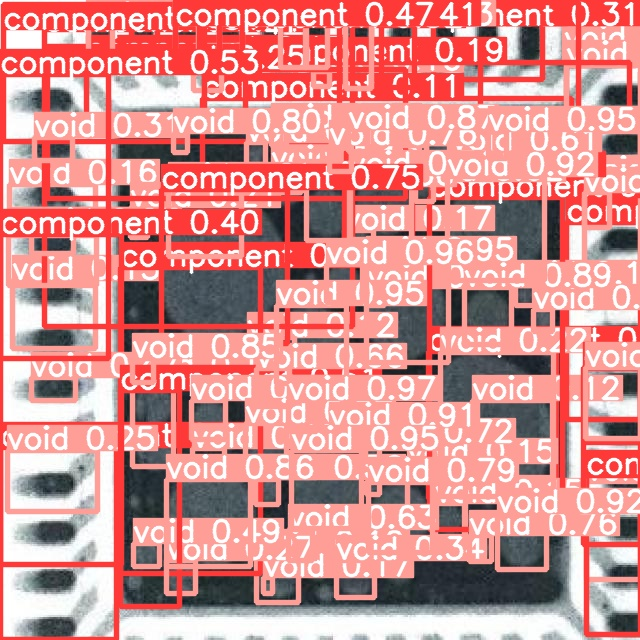

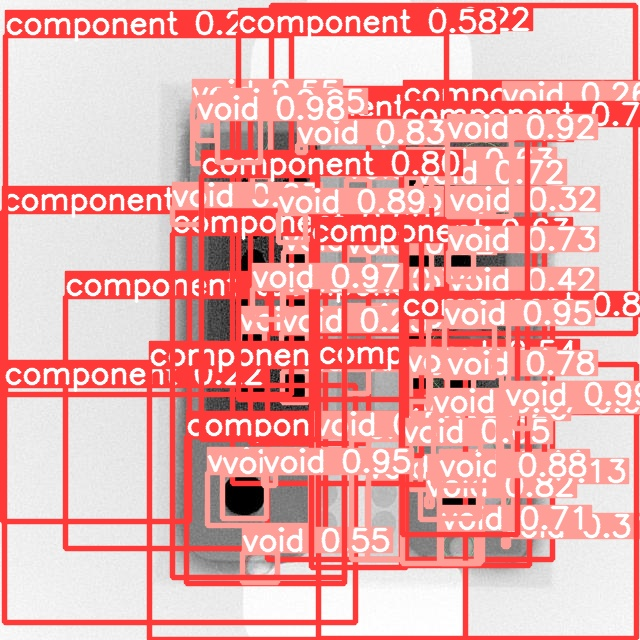

In [31]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp6/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

**Reference**

James Gallagher, Piotr Skalski. (Feb 23, 2024). How to Train YOLOv9 on a Custom Dataset. Roboflow Blog: https://blog.roboflow.com/train-yolov9-model/